In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer(as_frame=True)

In [3]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = breast_cancer_data.data
y = breast_cancer_data.target

##Data Exploration

###Data description

In [5]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

###Class Balance

Number of benign cases: 357
Number of malignant cases: 212


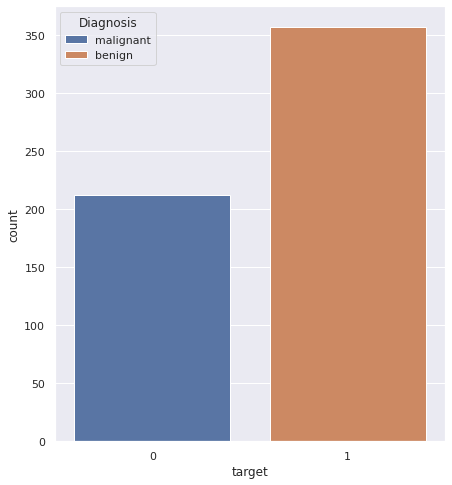

In [6]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(7,8))
ax = sns.countplot(x='target', hue='target', data=breast_cancer_data, dodge=False)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles, breast_cancer_data.target_names, title='Diagnosis')

benign, malignant = y.value_counts()

print(f'Number of benign cases: {benign}')
print(f'Number of malignant cases: {malignant}')

The classes are neither very unbalanced, nor are they very nearly balanced. It's balanced somewhere in between!

###Feature exploration

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###Normalization or Standardization

* Normalization, i.e. Min-Max scaling, is sensitive to outliers unlike Standardization. So, we first observe the spread of the values each feature takes to determine if the data needs to be MinMaxScaled or StandardScaled.

* Box plots are good for observing the spread of values, and detecting outliers.




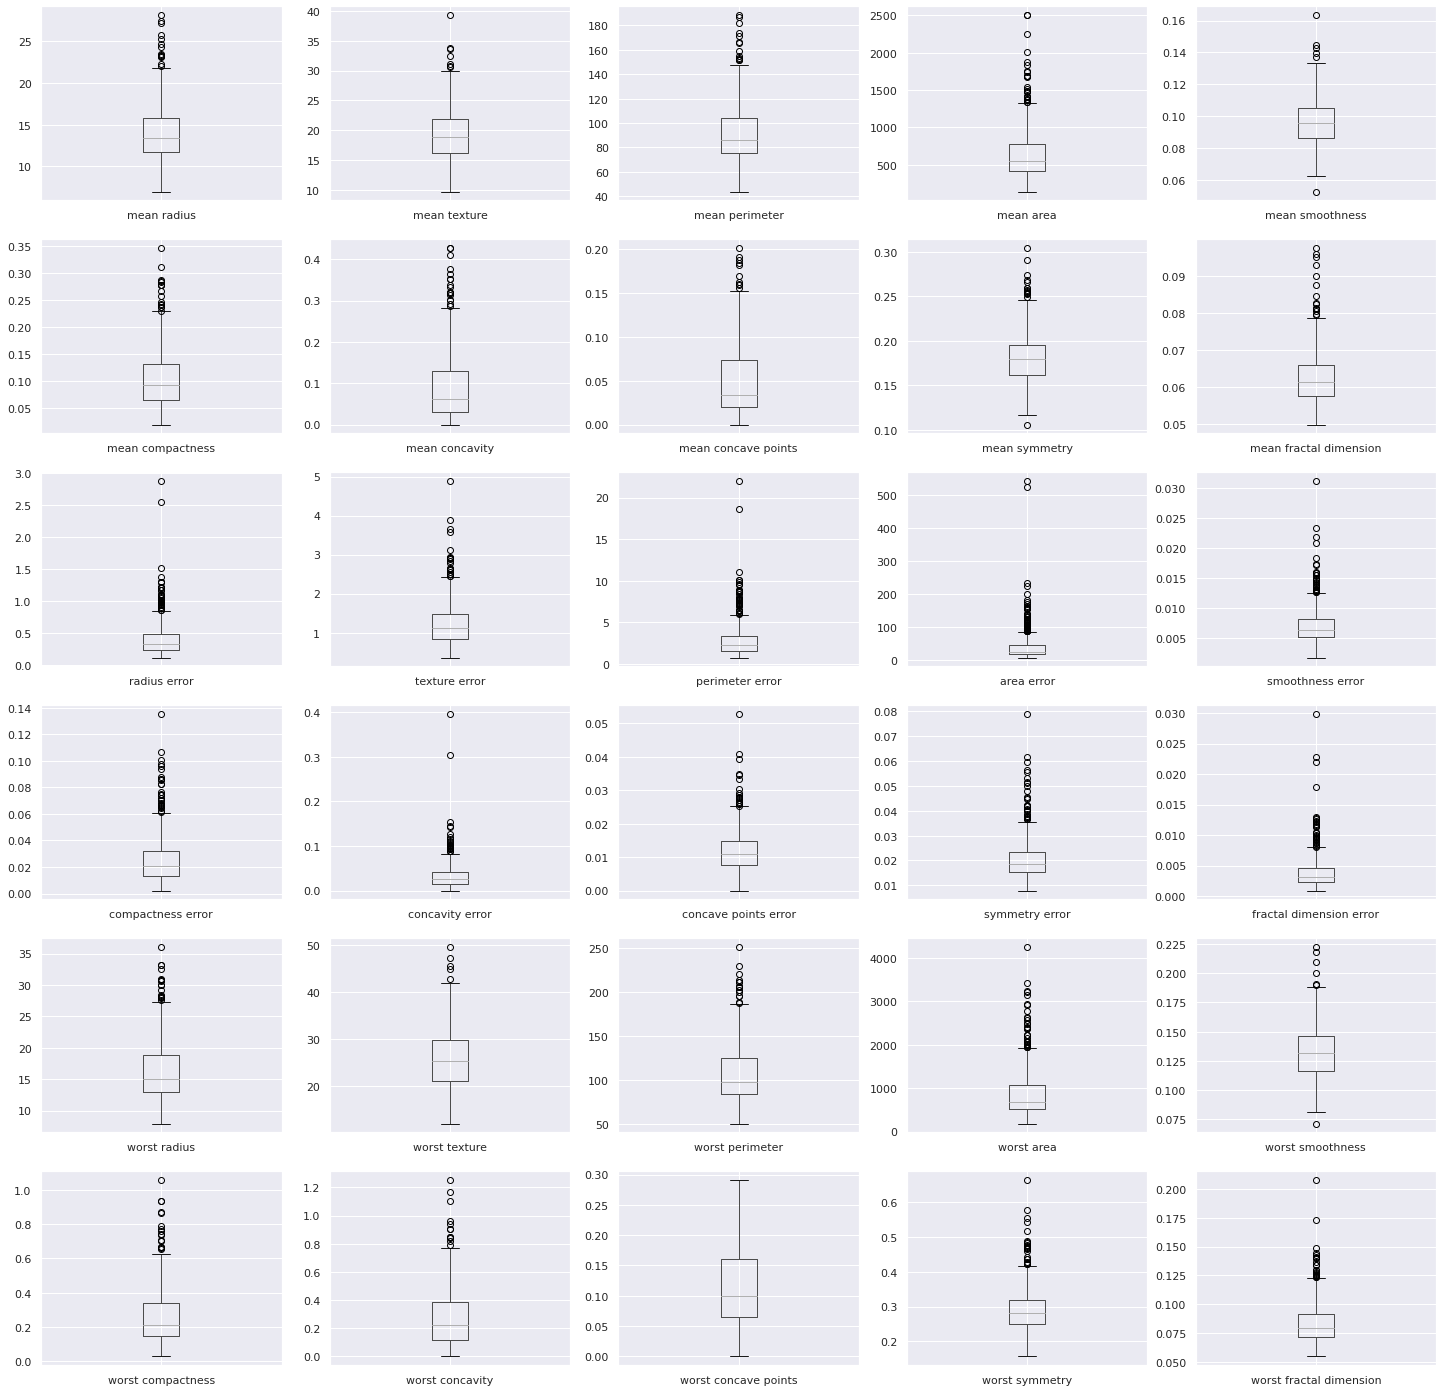

In [10]:
fig, ax = plt.subplots(6,5, figsize=(25,25))
for i, column in enumerate(X):  
  X.boxplot([column], ax=ax[i//5][i%5])

* After standard scaling, the features need not all be in the same exact scale. To ensure that the scale is same, we apply a min-max scaling after standard scaling.
* The need to be in the exact scale was felt initially just for the purpose of plotting (subsequent plots). But for the data without the min-max scaling, the performance of the models dipped perceptibly!

In [11]:
X_scaled = (X-X.mean())/X.std()
X_scaled = (X_scaled-X_scaled.min())/(X_scaled.max()-X_scaled.min())

###Featurewise perspective of diagnosis

* To get a feel of the influence of each feature in the final diagnosis, swarmplots are used; a feature is more influential if it takes values that reflect a good distinction among the different classes of the target.

* To avoid cluttering of too many features in a single plot, the features are divided naturally corresponding to the mean, error, and worst categories.

In [12]:
data = pd.concat([y, X_scaled.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars='target', var_name='features', value_name='value')

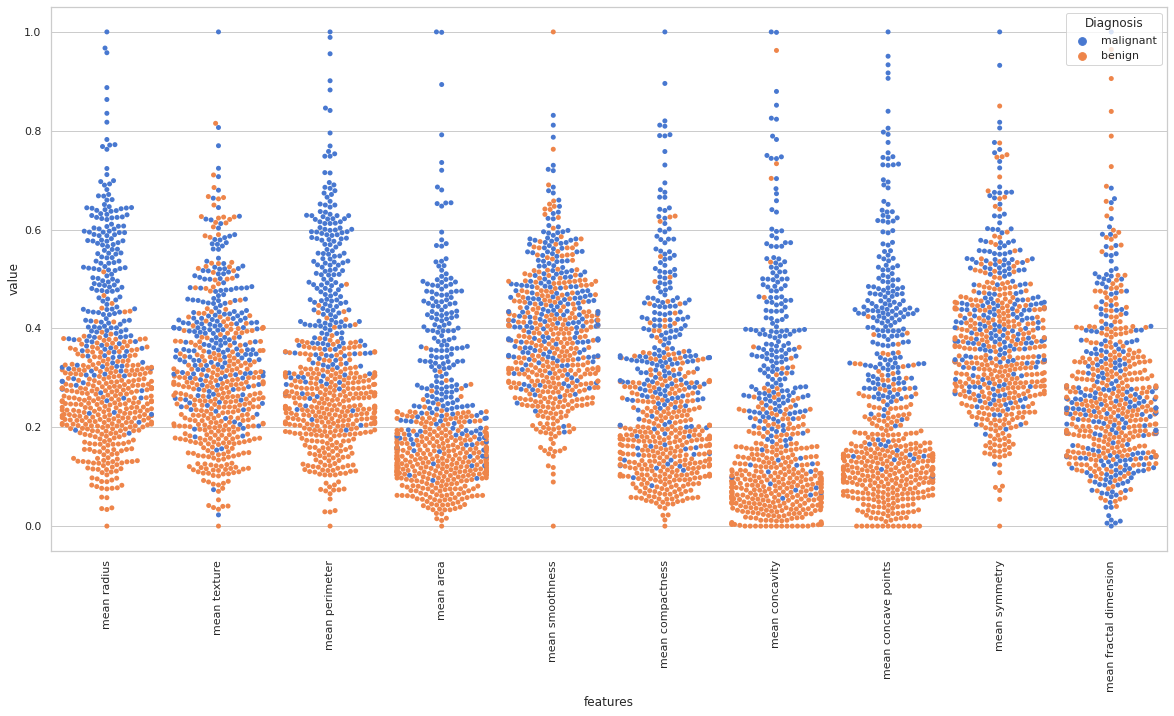

In [13]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(20,10))
ax = sns.swarmplot(x='features', y='value', hue='target', data=data, dodge=False)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles, breast_cancer_data.target_names, title='Diagnosis', loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [14]:
data = pd.concat([y, X_scaled.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars='target', var_name='features', value_name='value')

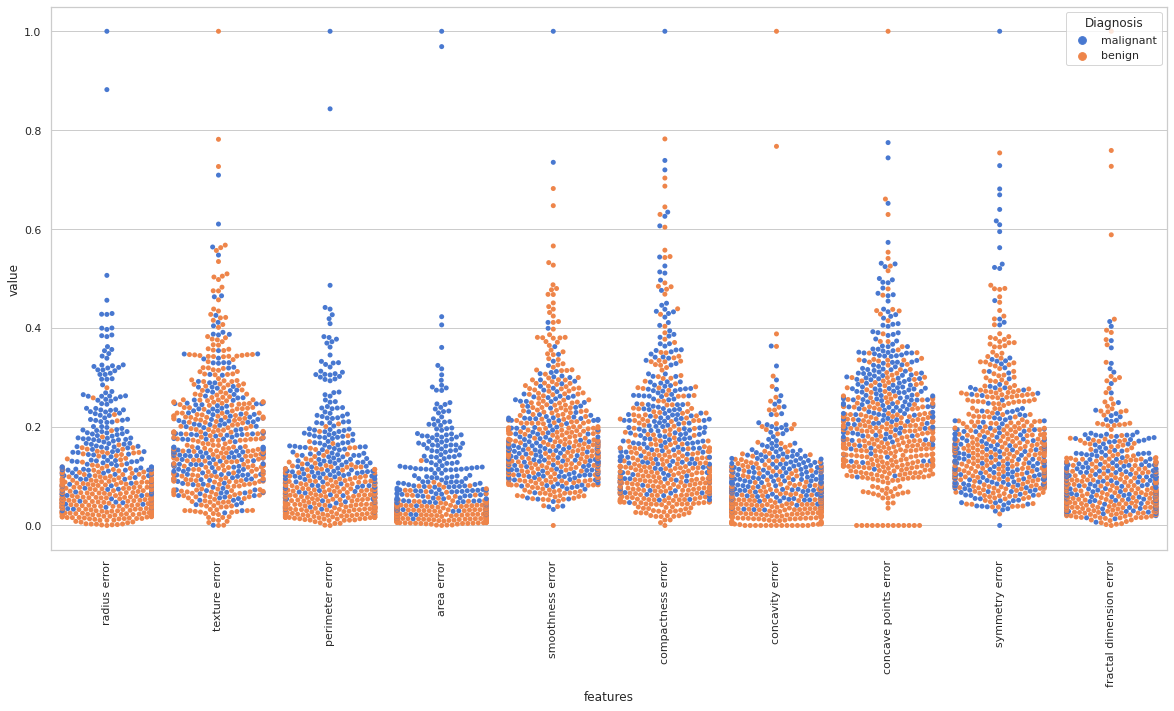

In [15]:
plt.figure(figsize=(20,10))
ax = sns.swarmplot(x='features', y='value', hue='target', data=data, dodge=False)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles, breast_cancer_data.target_names, title='Diagnosis', loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [16]:
data = pd.concat([y, X_scaled.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars='target', var_name='features', value_name='value')

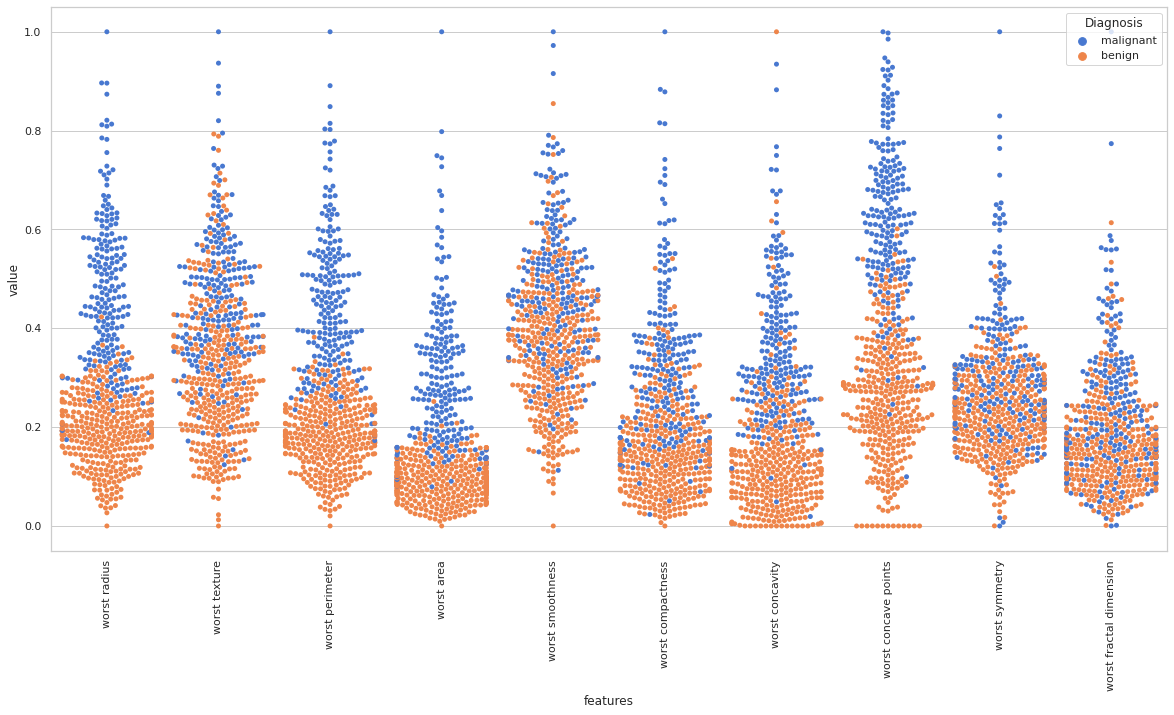

In [17]:
plt.figure(figsize=(20,10))
ax = sns.swarmplot(x='features', y='value', hue='target', data=data, dodge=False)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles, breast_cancer_data.target_names, title='Diagnosis', loc='upper right')
plt.xticks(rotation=90)
plt.show()

###Correlations

* Pairwise feature (linear) correlations are shown below.

* As expected multiple features (like, radius, perimeter, and area (mean, error, and worst)) take similar correlation values, indicating a strong linear correlation. Such correlated features can be dropped to reduce model complexity. (In this assignment, they haven't been dropped because the dataset is very small anyway, and further analysis shows that simple models (like LogisticRegression) themselves perform very well.)

* `Diagnosis` shows a negative correlation wrt most features because the correlations are computed wrt the positive class, viz. `benign` in our case. For most of these features (for example, conside `mean radius`), the greater the value, the more cancerous (malignant) the cell, and, therefore, the less benign.

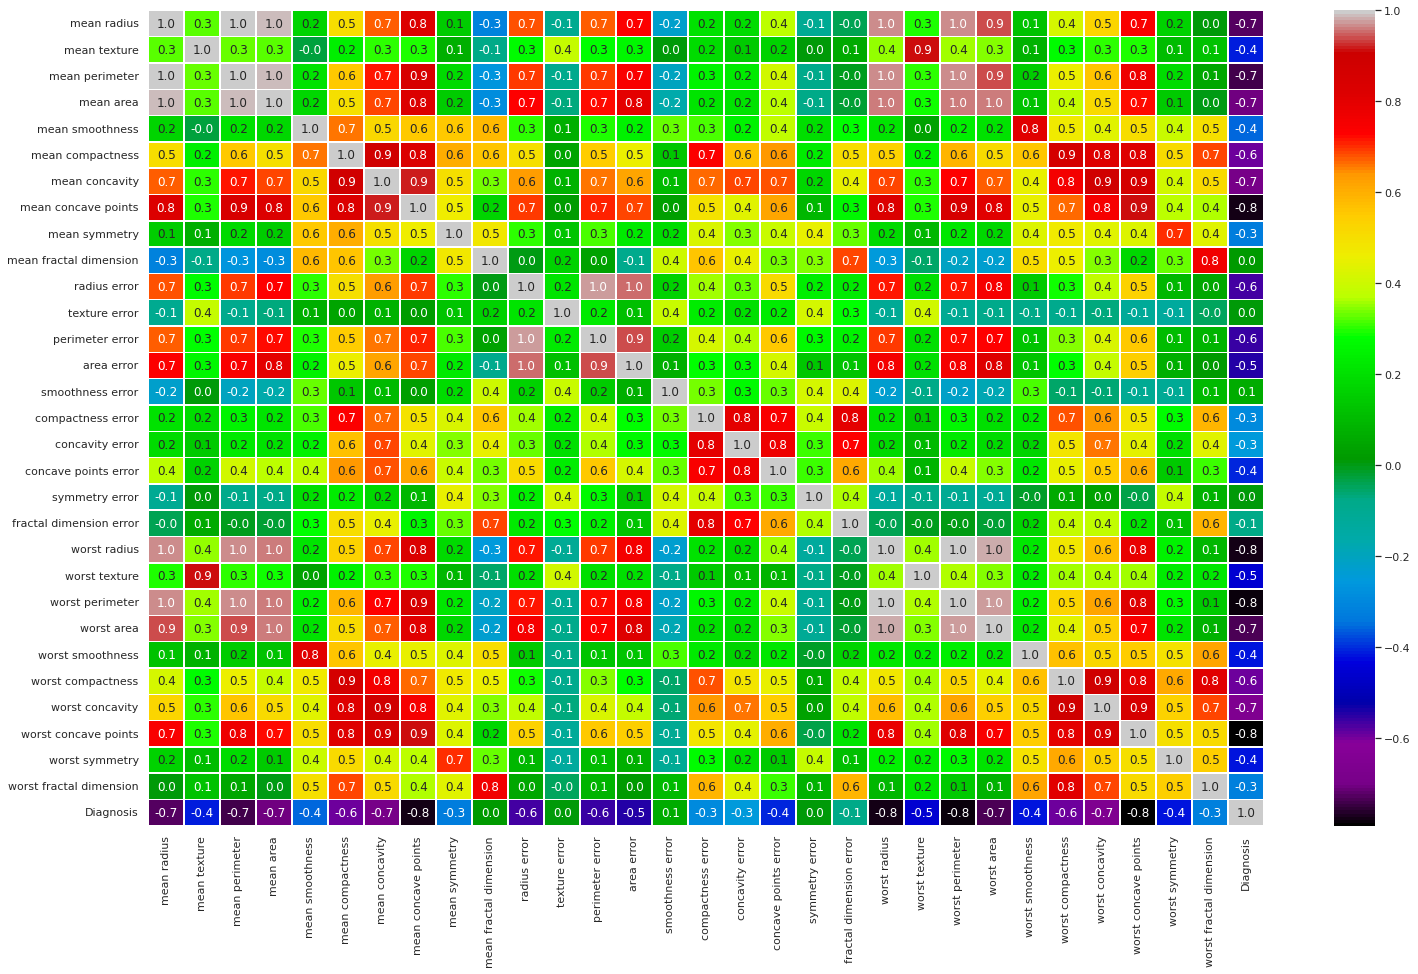

In [18]:
data = X_scaled.copy()
data['Diagnosis'] = y

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='nipy_spectral')
plt.show()

* Pairplots through graphical visualizations provides in one shot two perspectives already dscussed above-- a) featurewise perspective of diagnosis for which swarmplots were used, and b) pairwise correlations for which the above heatmap was plotted.

* For example, it's very evident here the linear correlation between `mean radius` and `mean perimeter`, and also the similar distribution of the values between them and the remaining features, respectively.

In [19]:
data = pd.concat([X_scaled, y], axis=1)

sns.set_theme(style='darkgrid')
sns.pairplot(data, hue='target')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

###Data visualization

* The data seems linearly separable, i.e., most points can be classified correctly by a simple linear model (and this is later validated by the performance of LogisticRegression, viz. a generalized linear model).

In [20]:
pca = PCA(n_components=2)

components = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(components, x=0, y=1, color=y,
                 title=f'Total Explained Variance: {total_var:.2f}%',
                 color_continuous_scale='spectral',
                 width=700, height=500)

fig.show()

In [21]:
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    color=y,    
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=600,
    color_continuous_scale='spectral')

fig.update_traces(marker={'size':3})

fig.show()

In [22]:
results = {}
results['precision'] = []
results['recall'] = []
results['f1 score'] = []

In [23]:
X = X_scaled

In [24]:
def plot_confusion_matrix(model, normalize=None, X=X, y=y):
  predictions = cross_val_predict(model, X, y, cv=5)

  C = confusion_matrix(y, predictions, normalize=normalize)
  class_names=[0,1]

  fig, ax = plt.subplots()

  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(C), annot=True, cmap="winter" ,fmt='g')

  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

  return predictions

In [25]:
def compute_scores(y_true, y_pred):  
  prec_score, rec_score, f_score, _ = precision_recall_fscore_support(y_true, y_pred)

  print('Malignancy:')  
  print('Precision: {:.3f}'.format(prec_score[0]))
  print('Recall: {:.3f}'.format(rec_score[0]))
  print('f1_score: {:.3f}'.format(f_score[0]))

  print('\n\nBenignness:')
  print('Precision: {:.3f}'.format(prec_score[1]))
  print('Recall: {:.3f}'.format(rec_score[1]))
  print('f1_score: {:.3f}'.format(f_score[1]))

  return prec_score[0], rec_score[0], f_score[0]

##Logistic Regression

In [26]:
log_reg = LogisticRegression()
accuracies = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print(f'Cross-fold accuracies: {accuracies}')
print(f'Overall average accuracy: {sum(accuracies)/len(accuracies):.3f}')

Cross-fold accuracies: [0.95614035 0.96491228 0.97368421 0.95614035 0.96460177]
Overall average accuracy: 0.963


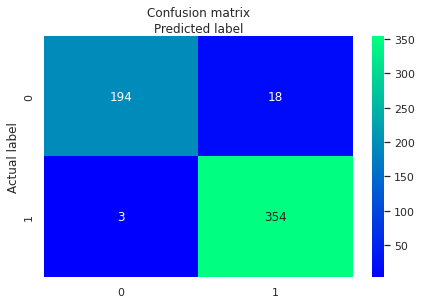

In [27]:
predictions = plot_confusion_matrix(log_reg)

In [28]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.985
Recall: 0.915
f1_score: 0.949


Benignness:
Precision: 0.952
Recall: 0.992
f1_score: 0.971


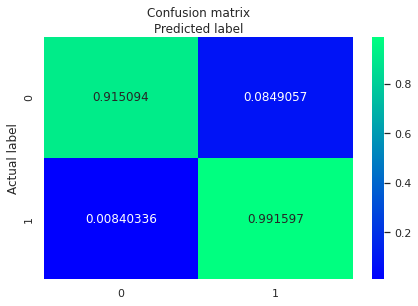

In [29]:
_ = plot_confusion_matrix(log_reg, normalize='true')

##k-NN classifier

In [30]:
params = {'n_neighbors': [5, 10, 50, 100], 'weights': ['uniform', 'distance']}
knn_classifier = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params)

knn_classifier.fit(X, y)

print(f'Best parameters: {knn_classifier.best_params_}')

Best parameters: {'n_neighbors': 10, 'weights': 'distance'}


In [31]:
print(f'Best score: {knn_classifier.best_score_}')

Best score: 0.9701133364384411


In [32]:
params = {'n_neighbors': [8, 9, 10, 11, 12, 13, 14, 15]}
knn_classifier = GridSearchCV(estimator = KNeighborsClassifier(weights='distance'), param_grid = params)

knn_classifier.fit(X, y)

print(f'Best parameters: {knn_classifier.best_params_}')

Best parameters: {'n_neighbors': 8}


In [33]:
print(f'Best score: {knn_classifier.best_score_}')

Best score: 0.9701443875174661


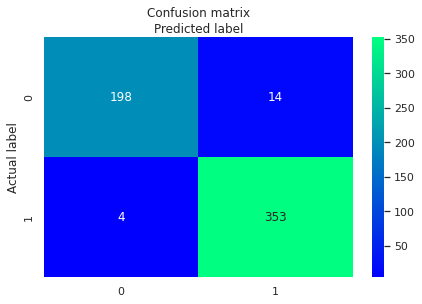

In [34]:
predictions = plot_confusion_matrix(knn_classifier)

In [35]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.980
Recall: 0.934
f1_score: 0.957


Benignness:
Precision: 0.962
Recall: 0.989
f1_score: 0.975


##SVM classifier

###Linear SVC

In [36]:
params = {'C': [1, 10, 50, 100]}

linear_svc = GridSearchCV(estimator=LinearSVC(), param_grid=params)
linear_svc.fit(X, y)

print(f'Best parameters: {linear_svc.best_params_}')

Best parameters: {'C': 1}


In [37]:
print(f'Best score: {linear_svc.best_score_}')

Best score: 0.9771774569166277


In [38]:
params = {'C': [0.5, 1, 1.5, 3, 5]}

linear_svc = GridSearchCV(estimator=LinearSVC(), param_grid=params)
linear_svc.fit(X, y)

print(f'Best parameters: {linear_svc.best_params_}')

Best parameters: {'C': 1.5}


In [39]:
print(f'Best score: {linear_svc.best_score_}')

Best score: 0.9771774569166279


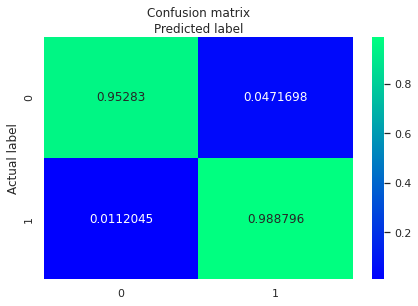

In [40]:
predictions = plot_confusion_matrix(linear_svc, normalize='true')

In [41]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.981
Recall: 0.953
f1_score: 0.967


Benignness:
Precision: 0.972
Recall: 0.989
f1_score: 0.981


###Gaussian SVC

In [42]:
params = {'C': [1, 10, 100]}

rbf_svc = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params)
rbf_svc.fit(X, y)

print(f'Best parameters: {rbf_svc.best_params_}')

Best parameters: {'C': 10}


In [43]:
print(f'Best score: {rbf_svc.best_score_}')

Best score: 0.9771774569166279


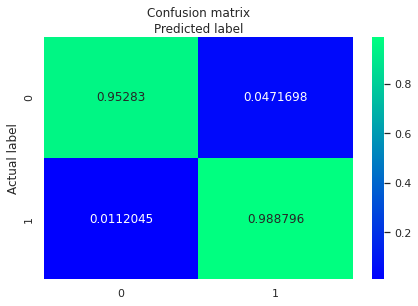

In [44]:
predictions = plot_confusion_matrix(rbf_svc, normalize='true')

In [45]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.981
Recall: 0.953
f1_score: 0.967


Benignness:
Precision: 0.972
Recall: 0.989
f1_score: 0.981


##DecisionTree Classifier

In [46]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 50, 100], 'min_samples_leaf': [10, 20, 50]}

dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params)
dt.fit(X, y)

print(f'Best parameters: {dt.best_params_}')

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}


In [47]:
print(f'Best score: {dt.best_score_}')

Best score: 0.9420121099208197


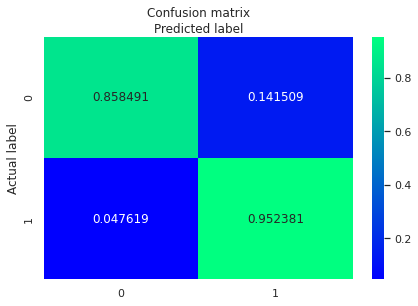

In [48]:
predictions = plot_confusion_matrix(dt, normalize='true')

In [49]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.915
Recall: 0.858
f1_score: 0.886


Benignness:
Precision: 0.919
Recall: 0.952
f1_score: 0.935


##RandomForest Classifier

In [50]:
params = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'bootstrap': [True, False]}
rfc = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params)
rfc.fit(X, y)

print(f'Best parameters: {rfc.best_params_}')

Best parameters: {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}


In [51]:
print(f'Best score: {rfc.best_score_}')

Best score: 0.9666511411271541


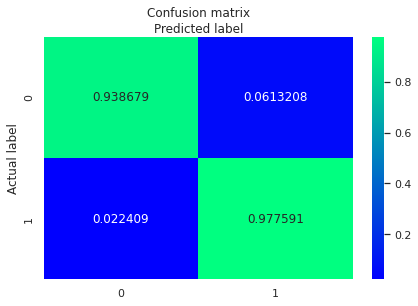

In [52]:
predictions = plot_confusion_matrix(rfc, normalize='true')

In [53]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.961
Recall: 0.939
f1_score: 0.950


Benignness:
Precision: 0.964
Recall: 0.978
f1_score: 0.971


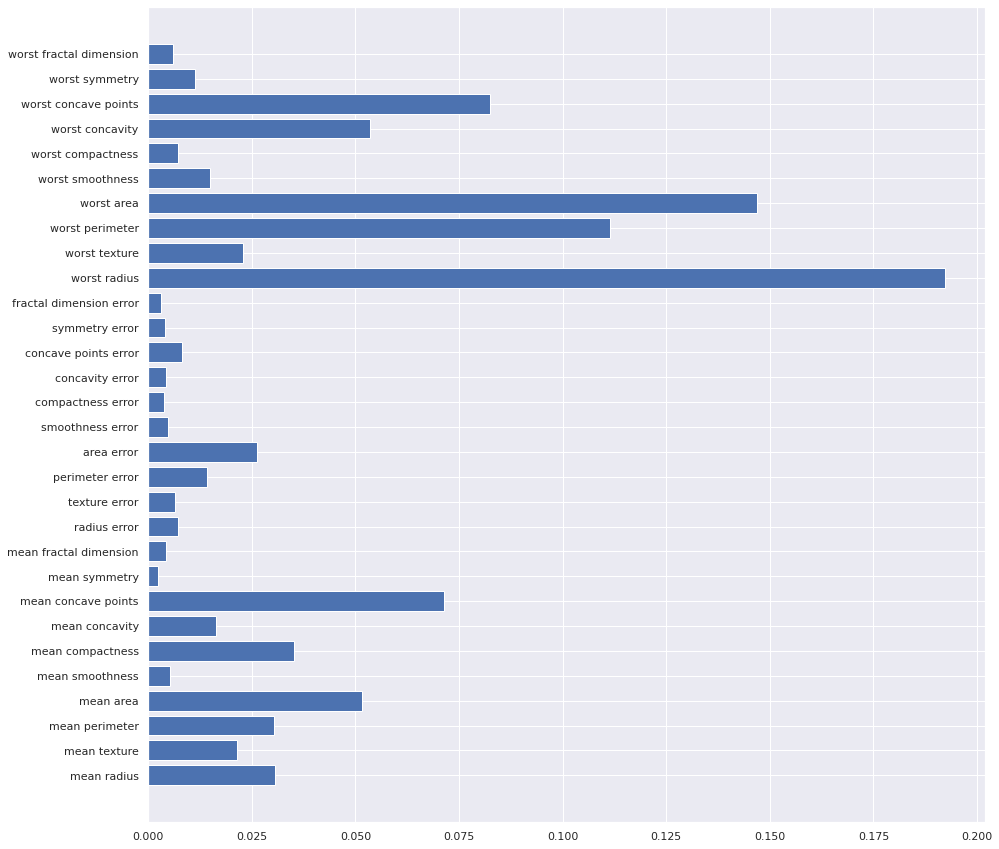

In [54]:
rfc = rfc.best_estimator_

plt.figure(figsize=(15,15))

y_pos = np.arange(len(breast_cancer_data.feature_names))
plt.barh(y_pos, rfc.feature_importances_)
plt.yticks(y_pos, breast_cancer_data.feature_names)
plt.show()

##Recursive Feature Elimination

* sklearn provides the RFECV module to identify the optimal number of features and the features themselves that can be used for training our data.

* RFECV stands for Recursive Feature Elimination Cross Validation. 

* At each iteration, using by default 5-fold validation, it applies RFE on the data to prune out unimportant features until the specified number of features are left. This number is not specified in RFECV; its value is instead ranged from $1$ to $n$--total number of features. For a particular $p$ number of features, the mean cross-validation score is noted. That $p$ (among $1$ to $n$) that corresponds to the highest score is returned as `n_features_`. The best features are the ones that are left after pruning by RFE.

In [55]:
rfecv = RFECV(estimator=RandomForestClassifier())
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='object')


In [56]:
X_opt = X.drop([col for col in X.columns if col not in X.columns[rfecv.support_]], axis=1)

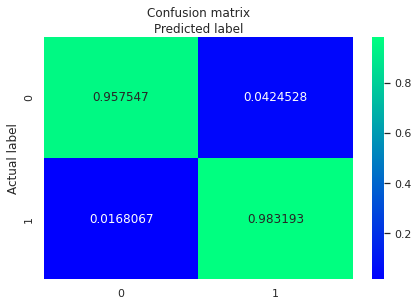

In [57]:
predictions = plot_confusion_matrix(linear_svc, normalize='true', X=X_opt, y=y)

In [58]:
p, r, f = compute_scores(y, predictions)
results['precision'].append(p)
results['recall'].append(r)
results['f1 score'].append(f)

Malignancy:
Precision: 0.971
Recall: 0.958
f1_score: 0.964


Benignness:
Precision: 0.975
Recall: 0.983
f1_score: 0.979


##Models' Performance

* Since the dataset is small, there's no train_test_split done for explicit training only on the training part of the dataset. Rather, only cross-validation scores are reported for all the models.

* Since the question was to predict malignancy, the scores plotted below are those for the `malignant` class.

* In this assignment, both precision and recall are very important, or maybe just a bit more importance to recall, because it would be more dangerous to miss out (not be able to recall) those who actually have cancer!

* Keeping that in mind, based on the scores obtained, Support Vector Machines have performed the best.

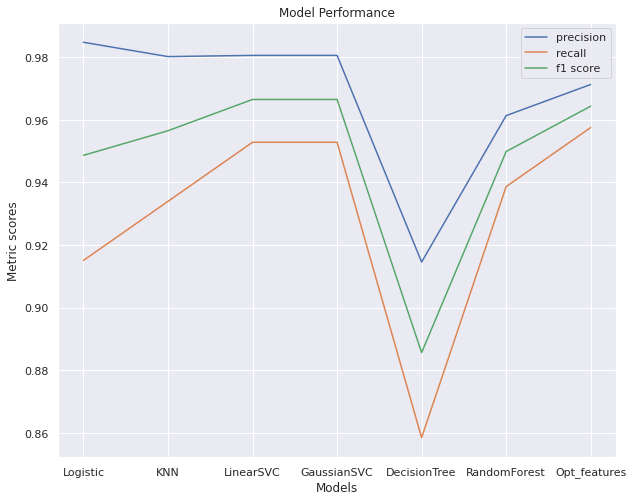

In [59]:
models = ['Logistic', 'KNN', 'LinearSVC', 'GaussianSVC', 'DecisionTree', 'RandomForest', 'Opt_features']
metrics = ['precision', 'recall', 'f1 score']

sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))

plt.xlabel('Models')
plt.ylabel('Metric scores')
plt.title('Model Performance')

for metric in metrics:  
  plt.plot(models, results[metric], label=metric)
  
plt.legend()
plt.show()